# ML&DL - Regressão linear simples I


## Base plano saúde


In [20]:
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install plotly --upgrade
!pip install seaborn --upgrade
!pip install yellowbrick --upgrade


  Using cached numpy-1.21.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.4 which is incompatible.
  Using cached numpy-1.19.5-cp39-cp39-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')


In [4]:
base_plano_saude = pd.read_csv('data/plano_saude.csv')
base_plano_saude


,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [5]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude


array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [6]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude


array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [7]:
np.corrcoef(X_plano_saude, y_plano_saude)


array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [8]:
X_plano_saude.shape


(10,)

In [9]:
X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude.shape


(10, 1)

In [10]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)


LinearRegression()

In [11]:
# a
regressor_plano_saude.intercept_


-558.9490909090912

In [12]:
# b
regressor_plano_saude.coef_


array([61.86787879])

In [13]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes


array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [14]:
X_plano_saude.ravel()


array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [15]:
grafico = px.scatter(x=X_plano_saude.ravel(), y=y_plano_saude)
grafico.add_scatter(x=X_plano_saude.ravel(), y=previsoes, name='Regressão')
grafico.show()


In [16]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40


array([1915.76606061])

In [17]:
regressor_plano_saude.predict([[40]])


array([1915.76606061])

In [18]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)


0.8666112727879174

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


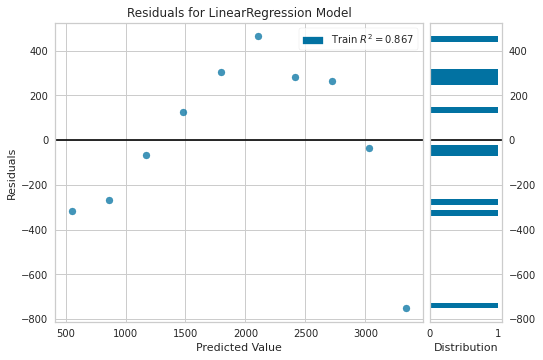

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()
